In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

### Критерий Хи-квадрат для одной случайной величины
Критерий Хи-квадрат (или критерий согласия Пирсона) используется для проверки того, соответствует ли категориальная случайна величина выбранному распределению. Есть всего два важных условия

- Все наблюдения независимы
- Количество наблюдений в каждой ячейке больше 5

Рассмотрим пример с определением того, честная ли у нас игральная кость. Пусть мы сделали 600 бросков игральной кости и записали в массив под номером каждой грани количество раз, которое она выпала


In [3]:
cube = [70, 110, 20, 300, 40, 60]

Для использования критерия для начала необходимо сформулировать предположение (H_0 гипотезу) о честности игральной кости и выразить его в виде вероятностного распределения. И зафиксировать уровень значимости 5%.

Данное предположение может быть описано равномерным распределением. 

Теперь необходимо посчитать, сколько выпадений каждой грани мы ожидаем при справедливости нашего предположения. Если вероятность получить каждую грань одинакова, то и ожидаем мы в итоге получить одинаковое количество выпадений каждой грани. То есть

In [2]:
trusted_cube = [100, 100, 100, 100, 100, 100]

После того как ожидаемое количество выпадений посчитано, мы можем вручную посчитать статистику критерия Хи-квадрат:

(Данная величина принадлежит к распределению Хи-квадрат с n-1 степенью свободы.)

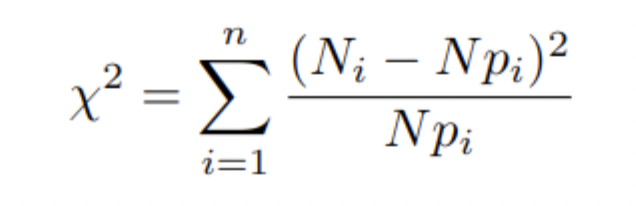

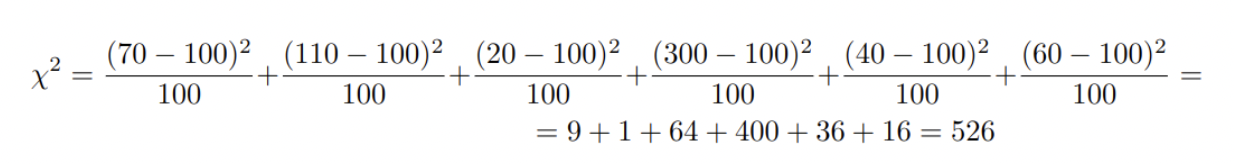

По таблице значений (или калькулятором) ищем значение под количество степеней свободы и уровень значимости, который мы хотим проверить. В нашем случае уровень значимости 5% и соответствующее значение квантили - 12,59. Мы видим что значение статистики очень сильно превосходит критическое значение, а значит, что с вероятностью минимум в 95 процентов с костью что то не так.

In [10]:
# Проверим результат с помощью statsmodels
stats.chisquare(cube, trusted_cube)

Power_divergenceResult(statistic=526.0, pvalue=1.9468087243178006e-111)

### Критерий Хи-квадрат для двух случайных величин

Критерий хи-квадрат также можно использовать для проверки того, равны ли у двух категориальных величин распределения.

Рассмотрим пример с проверкой однородности распределений для приложения, работающего на двух операционных системах. И нас интересует вопрос однородности распределения по городам присутствия приложения. 

In [37]:
cities = pd.read_csv('cities.csv')

In [38]:
cities

,city,ios,android
0,Москва,1000,920
1,Санкт Петербург,430,470
2,Новосибирск,270,280
3,Сочи,250,260
4,Казань,195,203
5,Екатеринбург,98,110


Сформулируем нулевую гипотезу как идентичность распределений по городам у групп iOS и Android. 

Альтернативную гипотезу об отличии распределений.

И зафиксируем уровень значимости 5%.

Проверим с помощью statsmodels, получим значение статистики и p_value.

In [30]:
stats.chisquare(cities['ios'], cities['android'])

Power_divergenceResult(statistic=12.726897145089113, pvalue=0.0260769730283546)

Значение p_value ниже 5%, значит мы отвергаем нулевую гипотезу. И принимаем вывод, что для iOS и Android имеется различное распределение по городам присутствия.

Такой вариант применения особенно полезен при проведении А/А-тестов и проверке системы сплитования. Он позволяет проверить гипотезу об обнородности контроля и теста по выбранному категориальному параметру.